In [1]:
import pandas as pd
from ast import literal_eval
import json
import numpy as np
import csv

In [2]:
dataset_df = pd.read_csv('data.csv',encoding="utf-8",converters={"tags":literal_eval})
dataset_df

,Unnamed: 0,name,steam_appid,release_date,is_free,required_age,rate,price,owners,tags
0,0,Dota 2,570,2013,True,0,0.829342,0,350000000,"[Free to Play, MOBA, Multiplayer, Strategy, e-..."
1,1,Counter-Strike: Global Offensive,730,2012,True,0,0.882848,0,75000000,"[FPS, Shooter, Multiplayer, Competitive, Actio..."
2,2,New World,1063730,2021,False,0,0.680567,3999,75000000,"[Massively Multiplayer, Open World, MMORPG, RP..."
3,3,Team Fortress 2,440,2007,True,0,0.936167,0,75000000,"[Free to Play, Hero Shooter, Multiplayer, FPS,..."
4,4,Apex Legends™,1172470,2020,True,0,0.858303,0,75000000,"[Free to Play, Multiplayer, Battle Royale, Sho..."
...,...,...,...,...,...,...,...,...,...,...
49541,49541,VEHICLES FURY,749290,2017,False,0,0.166667,1499,10000,"[Action, Indie, Racing]"
49542,49542,Crawler,1506770,2021,False,0,0.416667,399,10000,"[Adventure, Action RPG, Exploration, Dungeon C..."
49543,49543,Coins Collector Simulator,1868280,2022,False,0,0.625000,499,10000,"[Casual, Racing, Simulation, Sports, Strategy,..."
49544,49544,You Arrive in a Town,1466190,2021,False,0,0.473684,499,10000,"[Indie, Action, Casual, RPG, Action RPG, Arcad..."


In [3]:
'''
dictionary
key: year
val: dictionary mapping tag to number
'''
year_tag_dict = {}
for index, row in dataset_df.iterrows():
    year = row["release_date"]
    tags = row["tags"]
    if year in year_tag_dict:
        tag_count_dict = year_tag_dict[year]
        for tag in tags:
            if tag in tag_count_dict:
                tag_count_dict[tag] += 1
            else:
                tag_count_dict[tag] = 1
    else:
        year_tag_dict[year] = {}
        for tag in tags:
            year_tag_dict[year][tag] = 1

## Parse data for visualization 1, force directed graph of tags

In [17]:
tag_name = {}
for i,row in dataset_df.iterrows():
    tags = row["tags"]
    for tag in tags:
        if tag not in tag_name:
            tag_name[tag] = 1
        else:
            tag_name[tag] += 1

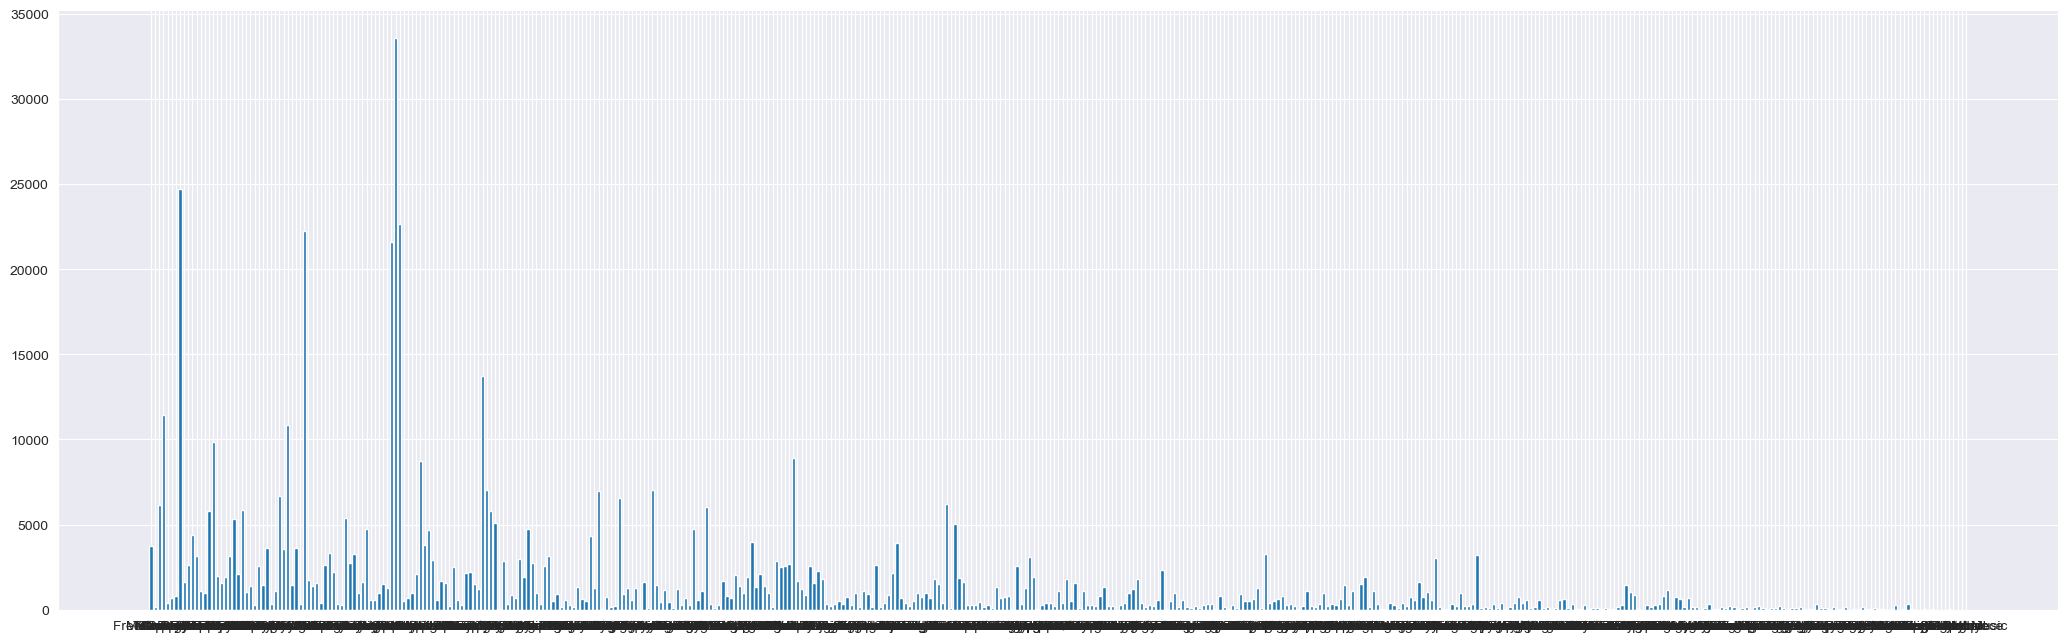

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0,0,1,1])
langs = tag_name.keys()
students = tag_name.values()
ax.bar(langs,students)
plt.show()

In [19]:
threshold = 2500
drop_num = 0
tag_use = []
for key in tag_name.keys():
    if tag_name[key] <= threshold:
        drop_num +=1
    else:
        tag_use.append(key)

In [20]:
print(drop_num)
print(len(tag_use))
print(tag_use)

374
65
['Free to Play', 'Multiplayer', 'Strategy', 'Action', 'PvP', 'Difficult', 'Co-op', 'Fantasy', 'RPG', 'FPS', 'Shooter', 'First-Person', 'Realistic', 'Survival', 'Early Access', 'Third Person', 'Simulation', 'Open World', 'Adventure', 'Sandbox', 'Violent', 'Funny', 'Cartoony', 'Comedy', 'Sci-fi', 'Singleplayer', 'Indie', 'Casual', 'Atmospheric', 'Great Soundtrack', 'Horror', 'Gore', 'Space', '2D', 'Pixel Graphics', 'Exploration', 'Platformer', 'Physics', '2D Platformer', 'Family Friendly', 'Controller', 'Combat', 'VR', 'Relaxing', '3D', 'Colorful', 'Story Rich', 'Anime', 'Cute', 'Action-Adventure', 'Point & Click', 'Psychological Horror', 'Dark', 'Mystery', 'Puzzle', 'Choices Matter', 'Sports', 'Female Protagonist', 'Arcade', 'Retro', 'Side Scroller', 'Stylized', 'Top-Down', 'Minimalist', 'Visual Novel']


In [21]:
length = len(tag_use)
matrix = [[0 for i in range(length)] for i in range(length)]
for i, row in dataset_df.iterrows():
    tags = row["tags"]
    for idx, tag in enumerate(tags):
        if tag in tag_use:
            for i in range(idx+1,len(tags)):
                if tags[i] in tag_use:
                    idx1 = tag_use.index(tag)
                    idx2 = tag_use.index(tags[i])
                    matrix[idx1][idx2] += 1

In [22]:
maxi = np.amax(matrix)
for i in range(length):
    for j in range(length):
        matrix[i][j] = matrix[i][j]/maxi * 50

In [23]:
'''
GOAL: json
{
    "nodes": [{"id": "tagname1", "group": 1}],
    "links": [{"source": "tagname1", "target": "tagname2", "value": co-occurance}]
}
'''
links = []
for i in range(length):
    for j in range(length):
        if i == j: continue
        if matrix[i][j] < 5:continue
        val = {"source":tag_use[i],"target":tag_use[j],"value":matrix[i][j]}
        links.append(val)

In [24]:
nodes = []
for i, tag in enumerate(tag_use):
    val = {"id": tag, "group": i+1}
    nodes.append(val)

In [25]:
vis1_dict = {"nodes":nodes,"links":links}
# Serializing json
json_object = json.dumps(vis1_dict, indent=4)
 
# Writing to sample.json
with open("visualization/vis1.json", "w") as outfile:
    outfile.write(json_object)

## Parse data for visualization 2, world cloud of tags

In [8]:
year = 2006
for i in range(16):
    year = year+1
    tag_list = year_tag_dict[year].keys()
    tag_count_list = []

    for i in list(year_tag_dict[year].keys()):
        if year_tag_dict[year][i] < 30:
            del year_tag_dict[year][i]

    for i in tag_list:
        tag_count_list.append(year_tag_dict[year][i])
    file = open('./visualization/WorldCloud/WordCloud_'+str(year)+'.txt','w')

    for i in tag_list:
        tag_count = year_tag_dict[year][i]
        for j in range(tag_count):
            file.write(i + ' ')

    file.close()



## Parse data for vis 4

In [ ]:
'''
header: year, tag1, tag2,...
'''
years = list(year_tag_dict.keys())
years.sort()

In [ ]:
import math
dataset_df["rate"].tolist()
for i in dataset_df["rate"].tolist():
    if math.isnan(i):
        print("nan found")

In [ ]:
for i in dataset_df["owners"].tolist():
    if math.isnan(i):
        print("nan found")

In [ ]:
rating = [[0 for i in range(len(tag_use))] for j in range(len(years))]
sum = [[0 for i in range(len(tag_use))] for j in range(len(years))]
for idx, row in dataset_df.iterrows():
    year = row["release_date"]
    tags = row["tags"]
    rate = row["rate"]
    if math.isnan(rate):
        continue
    sales = row["owners"]
    idx1 = years.index(year)
    for tag in tags:
        if tag in tag_use:
            idx2 = tag_use.index(tag)
            rating[idx1][idx2] += sales * rate
            sum[idx1][idx2] += sales

In [ ]:
for i in range(len(years)):
    for j in range(len(tag_use)):
        if sum[i][j] != 0:
            rating [i][j] = rating[i][j] / sum[i][j]

In [ ]:
for j in range(len(tag_use)):
    start = False
    for i in range(len(years)):
        if start:
            if rating[i][j] == 0:
                rating[i][j] = (rating[i-1][j] + rating[i+1][j])/2
        else:
            if rating[i][j] != 0:
                start = True

In [ ]:
rating

In [ ]:
with open("visualization/rate.csv", "w", newline="") as file:
    write = csv.writer(file)
    header = [["Year"] + tag_use]
    write.writerows(header)
    for i in range(len(years)):
        year = years[i]
        row = [year] + rating[i]
        write.writerows([row])

In [ ]:
with open("visualization/sales.csv", "w", newline="") as file:
    write = csv.writer(file)
    header = [["Year"] + tag_use]
    write.writerows(header)
    for i in range(len(years)):
        year = years[i]
        row = [year] + sum[i]
        write.writerows([row])

In [ ]:
with open("visualization/share.csv", "w", newline="") as file:
    write = csv.writer(file)
    header = [["Year"] + tag_use]
    write.writerows(header)
    for i in range(len(years)):
        year = years[i]
        val = np.array(sum[i],dtype=np.int64)
        val = val/val.sum()
        row = np.concatenate(([year],val))
        write.writerows([row])